<a href="https://colab.research.google.com/github/mrivereto/DS-Analise-Airbnb-RJ/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://github.com/mrivereto/DS-Analise-Airbnb-RJ/raw/main/listings.csv) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.


In [25]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1")

## Análise dos Dados


**Dicionário das variáveis**

| Campo | Tipo | Descrição |
|-------|:-----|:----------|
| id | int64 | número de id gerado para identificar o imóvel |
| name | object | nome da propriedade anunciada |
| host_id | int64 | número de id do proprietário (anfitrião) da propriedade |
| host_name | object | Nome do anfitrião |
| neighbourhood_group | float64 | esta coluna não contém nenhum valor válido |
| neighbourhood | object | nome do bairro |
| latitude | float64 | coordenada da latitude da propriedade |
| longitude | float64 | coordenada da longitude da propriedade |
| room_type | object | informa o tipo de quarto que é oferecido |
| price | int64 | preço para alugar o imóvel |
| minimum_nights | int64 | quantidade mínima de noites para reservar |
| number_of_reviews | int64 | número de reviews que a propriedade possui |
| last_review | object | data do último review |
| reviews_per_month | float64 | quantidade de reviews por mês |
| calculated_host_listings_count | int64 | quantidade de imóveis do mesmo anfitrião |
| availability_365 | int64 | número de dias de disponibilidade dentro de 365 dias |

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,359,2021-04-21,2.79,1,139
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.98102,-43.19172,Entire home/apt,493,3,18,2016-02-09,0.18,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

No dataset utilizado encontramos 26467 entradas com 16 variáveis.

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 26467
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
last_review                       0.371179
reviews_per_month                 0.371179
host_name                         0.032380
name                              0.001096
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para demonstrar a distribuição das varáveis será exibido um histograma.

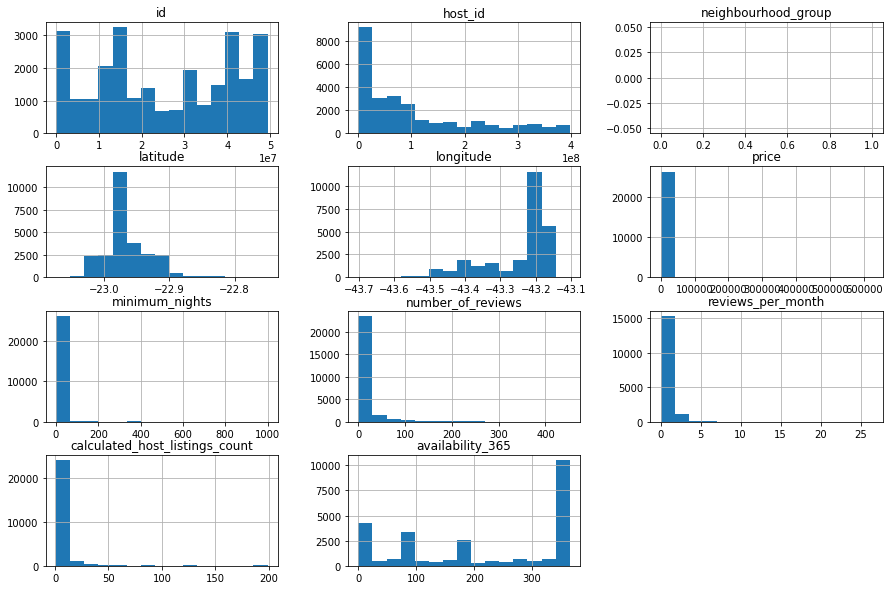

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**

Podemos observar que a média de preços é de 260 reais

In [12]:
# ver a média da coluna `price``
df.price.median()

260.0

### **Q4. Qual a correlação existente entre as variáveis**

In [16]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.008837,-0.032166,-0.037253,0.037261,-0.009216
minimum_nights,0.008837,1.000000,-0.033446,-0.039278,-0.005069,0.022223
number_of_reviews,-0.032166,-0.033446,1.000000,0.643224,-0.049497,-0.070989
reviews_per_month,-0.037253,-0.039278,0.643224,1.000000,-0.020188,-0.133077
calculated_host_listings_count,0.037261,-0.005069,-0.049497,-0.020188,1.000000,0.025861
availability_365,-0.009216,0.022223,-0.070989,-0.133077,0.025861,1.000000


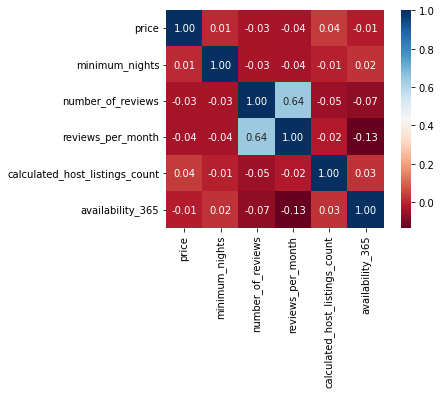

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Podemos observar que o tipo de imóvel mais alugado é o imóvel completo, sendo casa ou apartamento.

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    19132
Private room        6627
Shared room          611
Hotel room            97
Name: room_type, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.722862
Private room       0.250387
Shared room        0.023085
Hotel room         0.003665
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Abaixo mostramos as 10 localidades mais caras para locação.

In [24]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
São Cristóvão         7860.445783
Joá                   5327.468085
Bangu                 3255.947368
Anchieta              2848.500000
São Conrado           2453.451163
Saúde                 2050.315789
Alto da Boa Vista     1850.195122
Vila Militar          1408.666667
Caju                  1325.000000
Barra de Guaratiba    1196.181818
Name: price, dtype: float64

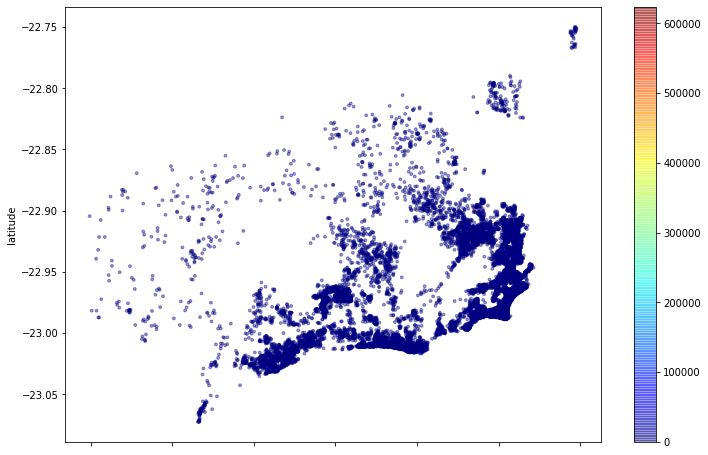

In [26]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [27]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.median()

2.0

## Conclusões


Neste projeto realizamos uma análise dos dados do Airbnb referente a cidade do Rio de Janeiro. Dentre os diversos dados e informações que pudemos observar, acredito que o mais relevante para os seus usuários são a média de preço cobrado por diária que está em `R$ 260,00` e a quantidade média de noites que são locados os imóveis que está em `2 noites`.